Basic Imports

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [2]:
data = pd.read_csv("insurance.csv")

data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
data.shape

(1338, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Check the feature correlations

<AxesSubplot:>

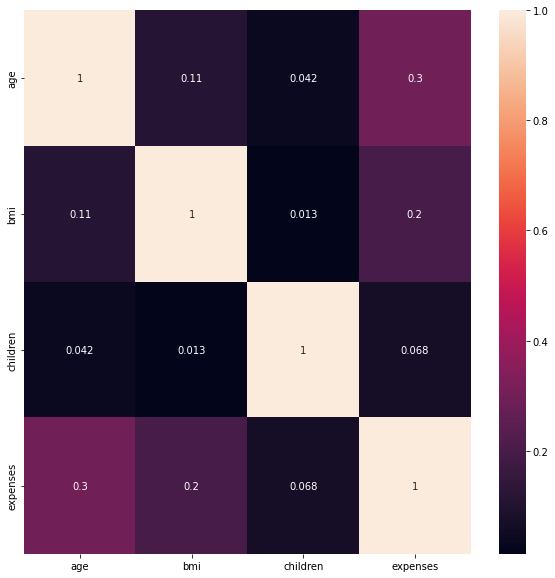

In [5]:
fig, ax = plt.subplots(figsize=(10,10))

corr = data.corr()
sns.heatmap(corr , annot = True , ax=ax)

Save Object

In [6]:
import pickle

def save_object(obj , name):
    pickle_obj = open(f"{name}.pck","wb")
    pickle.dump(obj, pickle_obj)
    pickle_obj.close()

Label Encode Object Types

In [7]:
d_types = dict(data.dtypes)
for name , type_ in d_types.items():
    if str(type_) == 'object':
        print(f"<======== {name} ===========>")
        print(data[name].value_counts())
        print()

<======== sex ===========>
male      676
female    662
Name: sex, dtype: int64

<======== smoker ===========>
no     1064
yes     274
Name: smoker, dtype: int64

<======== region ===========>
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64



In [8]:
from sklearn.preprocessing import LabelEncoder

for name , type_ in d_types.items():
    if str(type_) == 'object':
        Le = LabelEncoder()
        data[name] = Le.fit_transform(data[name])
        save_object(Le , f"Label_Encoder_{name}")

Check info after Label Encoding

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


One hot Encoding 

In [10]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
part = onehotencoder.fit_transform(data['region'].values.reshape(-1,1)).toarray()
save_object(onehotencoder , "OneHotEncoder_region")

values = dict(data["region"].value_counts())

for e , (val , _) in enumerate(values.items()):
    data["region_" + str(val)] = part[:,e]

data = data.drop(["region"] , axis = 1)

data.head()

,age,sex,bmi,children,smoker,expenses,region_2,region_3,region_1,region_0
0,19,0,27.9,0,1,16884.92,0.0,0.0,0.0,1.0
1,18,1,33.8,1,0,1725.55,0.0,0.0,1.0,0.0
2,28,1,33.0,3,0,4449.46,0.0,0.0,1.0,0.0
3,33,1,22.7,0,0,21984.47,0.0,1.0,0.0,0.0
4,32,1,28.9,0,0,3866.86,0.0,1.0,0.0,0.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   expenses  1338 non-null   float64
 6   region_2  1338 non-null   float64
 7   region_3  1338 non-null   float64
 8   region_1  1338 non-null   float64
 9   region_0  1338 non-null   float64
dtypes: float64(6), int32(2), int64(2)
memory usage: 94.2 KB


Handle Skewness in Predictive column

In [12]:
Original_Y = data["expenses"].values.copy()

In [13]:
Original_Y

array([16884.92,  1725.55,  4449.46, ...,  1629.83,  2007.95, 29141.36])

Skewness in Column : Expenses  1.51587966289798


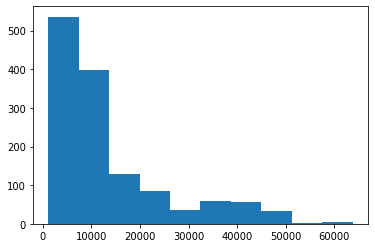

In [14]:
print("Skewness in Column : Expenses " , data["expenses"].skew())

plt.hist(data["expenses"])
plt.show()

Skewness in Column : Log Expenses  -0.0900974307762623


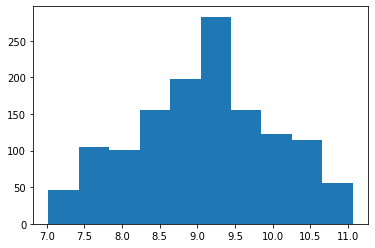

In [15]:
col_log = np.log(data["expenses"])
print("Skewness in Column : Log Expenses " , col_log.skew())

plt.hist(col_log)
plt.show()

Skewness in Column : Sqrt Expenses  0.7958625295340573


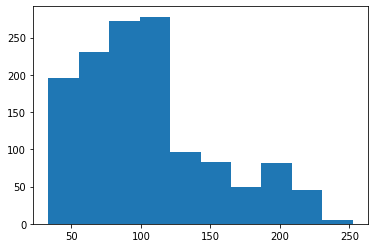

In [16]:
col_sqrt = np.sqrt(data["expenses"])

print("Skewness in Column : Sqrt Expenses " ,col_sqrt.skew())

plt.hist(col_sqrt)
plt.show()

Skewness in Column : Sqrt Expenses  -0.008734062011873602


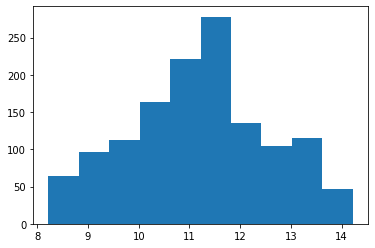

In [17]:
from scipy import stats 

col_cox , lam = stats.boxcox(data["expenses"])[0:2]
print("Skewness in Column : Sqrt Expenses " ,pd.Series(col_cox).skew())

save_object(lam , "boxcox_lambda")

plt.hist(col_cox)
plt.show()

In [18]:
data["expenses"] = col_cox

Make Features and Targets

In [19]:
remaining_columns = list(data.columns)
remaining_columns.remove("expenses")

In [20]:
save_object(remaining_columns , "columns")

In [21]:
X = data[remaining_columns].values 
Y = data['expenses'].values

In [22]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

Scaler = StandardScaler()
Xtrain = Scaler.fit_transform(Xtrain)
Xtest = Scaler.transform(Xtest)

save_object(Scaler , "Scaler")

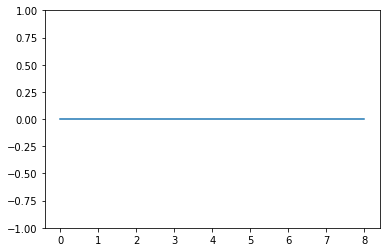

In [23]:
# check whether data is standardized or not 
# mean should be 1 

plt.ylim(-1,1)

means = []
for i in range(Xtrain.shape[1]):
    means.append(np.mean(Xtrain[:,i]))
plt.plot(means , scaley=False)

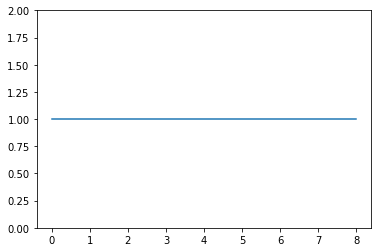

In [24]:
# Check variances 

plt.ylim(0,2)

vars = []
for i in range(Xtrain.shape[1]):
    vars.append(np.var(Xtrain[:,i]))
plt.plot(vars)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA 

pca = PCA(n_components = 7)
Xtrain = pca.fit_transform(Xtrain)
Xtest = pca.transform(Xtest)

pca.explained_variance_ratio_.cumsum()

save_object(pca , "PCA")

Defining Metrics 

In [26]:
def rmse_score(y_test , y_pred):
    value = (1/len(y_test))*np.sum((y_test - y_pred)**2)
    return np.sqrt(value)

def r2_score(y_test , y_pred):
    numenator = (1/len(y_test))*np.sum((y_test - y_pred)**2)
    denominator = (1/len(y_test))*np.sum((y_test - np.mean(y_test))**2)
    return (1 - (numenator/denominator))

def mae(y_test , y_pred):
    return (1/len(y_test))*np.sum(np.abs(y_test - y_pred))

def adj_r2_score(y_test , y_pred , n_features):
    numenator = (1-r2_score(y_test , y_pred))*(len(y_test) - 1)
    denominator = len(y_test) - n_features - 1
    return 1 - (numenator/denominator)

In [27]:
model = LinearRegression()
model.fit(Xtrain , Ytrain)

Ypred = model.predict(Xtest)

print("rmse_score : " , rmse_score(Ytest , Ypred))
print("r2_score : " , r2_score(Ytest , Ypred))
print("mae : " , mae(Ytest , Ypred))
print("adj_r2_score : " , adj_r2_score(Ytest , Ypred , Xtest.shape[1]))

rmse_score :  0.6817554906479538
r2_score :  0.7497119096615364
mae :  0.42150203685059967
adj_r2_score :  0.742973384152424


In [28]:
save_object(model , "MyModel")

Realtime Prediction

In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [30]:
# Values 
# Label Encoding 
# OneHotEncoding 
# Scaler 
# PCA
# Predict
# Inverse Boxcox

In [31]:
def load_object(name):
    pickle_obj = open(f"{name}.pck","rb")
    obj = pickle.load(pickle_obj)
    return obj

In [32]:
# Load the Data Point 

data = pd.read_csv("insurance.csv")

idx = np.random.choice(len(data))
to_be_predicted = data.iloc[idx,:].values

col_names = data.columns 
predict_dict = {}

for col_name , val in zip(col_names , to_be_predicted):
    predict_dict[col_name] = val

print(predict_dict)

{'age': 56, 'sex': 'female', 'bmi': 28.3, 'children': 0, 'smoker': 'no', 'region': 'northeast', 'expenses': 11657.72}


In [33]:
real_value = predict_dict["expenses"]
del predict_dict["expenses"]

In [34]:
predict_dict["region"] = load_object("Label_Encoder_region").transform(np.array(predict_dict["region"]).reshape(-1,))

In [35]:
predict_dict["sex"] = load_object("Label_Encoder_sex").transform(np.array(predict_dict["sex"]).reshape(-1,))[0]

In [36]:
predict_dict["smoker"] = load_object("Label_Encoder_smoker").transform(np.array(predict_dict["smoker"]).reshape(-1,))[0]

In [37]:
predict_dict

{'age': 56,
 'sex': 0,
 'bmi': 28.3,
 'children': 0,
 'smoker': 0,
 'region': array([0])}

In [38]:
predict_dict["region_ohe"] = load_object("OneHotEncoder_region").transform(predict_dict["region"].reshape(-1,1)).toarray()[0]

In [39]:
predict_dict

{'age': 56,
 'sex': 0,
 'bmi': 28.3,
 'children': 0,
 'smoker': 0,
 'region': array([0]),
 'region_ohe': array([1., 0., 0., 0.])}

In [40]:
del predict_dict["region"]

In [41]:
for e , i in enumerate(predict_dict["region_ohe"]):
    predict_dict["region_" + str(e)] = i

In [42]:
del predict_dict["region_ohe"]

In [43]:
predict_dict

{'age': 56,
 'sex': 0,
 'bmi': 28.3,
 'children': 0,
 'smoker': 0,
 'region_0': 1.0,
 'region_1': 0.0,
 'region_2': 0.0,
 'region_3': 0.0}

In [44]:
# Lets make the main array 

col_sequence = load_object("columns")
array = []

for col_name in col_sequence :
    array.append(predict_dict[col_name])

array = np.array(array)

print(array)

[56.   0.  28.3  0.   0.   0.   0.   0.   1. ]


In [45]:
array = load_object("Scaler").transform(array.reshape(1,-1))

In [46]:
array = load_object("PCA").transform(array)

In [47]:
array

array([[-0.48449814,  2.07577374, -0.25695377, -1.38929678, -0.14725866,
        -0.88091272,  0.54002108]])

In [48]:
prediction = load_object("MyModel").predict(array)
print(prediction)

[11.38656626]


In [49]:
from scipy.special import inv_boxcox

prediction = inv_boxcox(prediction , load_object("boxcox_lambda"))

print(prediction)

[10337.55689126]


In [50]:
print(" Original " , real_value , " , Predicted " , float(prediction[0]))

 Original  11657.72  , Predicted  10337.556891255837
